<a href="https://colab.research.google.com/github/Aleksei115/ParadigmasCD/blob/main/PCA%20y%20LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Supongamos que tenemos un conjunto de datos con dos variables en forma de matriz
# Cada fila representa una observación y cada columna una variable.
data = np.array([[1.2, 2.3, 3.1],
                 [2.1, 3.4, 4.0],
                 [3.6, 4.1, 5.2],
                 [4.2, 5.2, 6.3]])

# Calculamos las medias de las variables
mean_vector = np.mean(data, axis=0)

# Calculamos la matriz de diferencias
differences = data - mean_vector

# Calculamos la matriz de covarianza
cov_matrix = np.cov(data, rowvar=False)  # Usamos rowvar=False para que las variables estén en columnas

print("Matriz de Covarianza:")
print(cov_matrix)

Matriz de Covarianza:
[[1.8825     1.625      1.895     ]
 [1.625      1.48333333 1.68666667]
 [1.895      1.68666667 1.95      ]]


In [ ]:
import plotly.express as px

df = px.data.iris()

fig = px.scatter_3d(df,x='sepal_length',y='petal_length',z='petal_width')
fig.show()

# Principal Component Analysis - PCA

PCA se encarga de regresar las componentes ortogonales que maximizan la varianza

In [20]:
df_wine = pd.read_csv('https://bit.ly/3L1ZZI4',header=None)

# df_wine.head(3)

Separamos el conjunto en datos de entrenamiento y datos de prueba.

In [34]:
#TODAS las filas y de la columna 1 hasta la ultima para X

#Para Y todas las filas y solo la columna 1


X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

Estandarizamos los datos

In [44]:
sc = StandardScaler()

#Aqui estandarizamos los datos
X_train_std = sc.fit_transform(X_train)

X_test_std = sc.transform(X_test)

X_train_std.shape

(124, 13)

Descomponer la matriz de covarianza y obtener los eigenvalores y eigenvectores

In [45]:
cov_mat = np.cov(X_train_std.T)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print("Eigenvalores",eigen_vals)

Eigenvalores [4.62601734 2.61246917 1.58062223 0.9886617  0.85041938 0.57130818
 0.46938706 0.36255644 0.11287656 0.17303358 0.28977105 0.25906819
 0.20950018]


##### Crear esta grafica nos ayudara a visualizar cuantas componentes queremos obtener despues de aplicar PCA o LDA. En el caso de este notebook, elegimos 2 componentes ya que con 2 componentes alcanzamos el 60% de la varianza

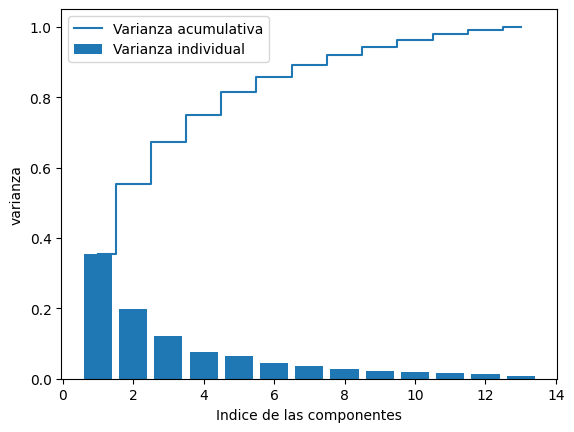

In [47]:
#Grafica con los aportes de cada eigenvalor

tot = sum(eigen_vals)

# Varianza explicada
var_exp = [ev/tot for ev in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14),var_exp,label='Varianza individual', align='center')

plt.step(range(1,14),cum_var_exp,label='Varianza acumulativa',where='mid')

plt.xlabel('Indice de las componentes')
plt.ylabel('varianza')
plt.legend(loc='best')
plt.show()

Lista de eigenvalores y eigenvalores

In [48]:
eigen_par = [(np.abs(eigen_vals[i]),eigen_vecs[i]) for i in range(len(eigen_vals))]

#Ordenamiento descendente

eigen_par.sort(key= lambda k:k[0], reverse=True)


Creamos la matriz de transformación

In [49]:
w = np.hstack((eigen_par[0][1][:,np.newaxis], eigen_par[1][1][:,np.newaxis] ))

print('Matriz w: \n',w)

Matriz w: 
 [[ 0.13258227 -0.23595667]
 [ 0.48485592  0.25660265]
 [ 0.19289636 -0.07596076]
 [-0.03563474  0.59772604]
 [-0.31315666  0.01409293]
 [ 0.15206109  0.26490075]
 [-0.03435125 -0.51789021]
 [-0.2411596  -0.1912089 ]
 [ 0.01890475  0.08847956]
 [ 0.11907984  0.00246569]
 [-0.14676818 -0.23500741]
 [-0.67345894  0.27446846]
 [-0.1967358   0.04352939]]


Transformar una muestra $1 x 13$ ad $1x2$


In [50]:
print('Original : ', X_train_std[0])
print('Proyectada: ',X_train_std[0].dot(w))

Original :  [ 0.84905211 -0.38140555  0.03038798 -0.78298008  0.08954355  0.51119828
  0.85800163 -0.70242983  0.20053374 -0.51558702  0.60264039  1.91611261
  0.88934463]
Proyectada:  [-1.46042048 -0.50241412]


In [51]:
X_train_pca = X_train_std.dot(w)
X_train_pca.shape

(124, 2)

## Tarea

Probar con una LR Logistic Regression


##PCA  en sklearn

In [64]:
from sklearn.model_selection import train_test_split

df_wine = pd.read_csv('https://bit.ly/3L1ZZI4',header=None)

X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values


Elegimos conjunto de entrenamiento y conjunto de prueba

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Estandarizamos los datos

In [67]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Revisar con LR

In [68]:
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)

lr = LogisticRegression(multi_class='auto', solver='liblinear')

In [69]:
X_train_pca = pca.fit_transform(X_train_std)

X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca,y_train)

LogisticRegression(solver='liblinear')

Grafica del conjunto de entrenamiento

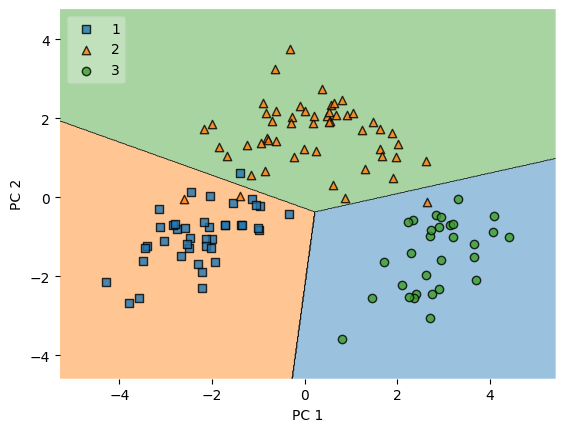

In [71]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_pca,y_train,clf=lr,legend = 2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

SI tienes un conjunto etiquetado puede utilizar  LINEAR DISCRIMINANT ANALYSIS, y es aprendizaje supervisado

LDA se encarga de encontrar componentes ortogonales que maximice la varianza entre las categorias y pueda asi, maximizar la separabilidad de los datos.


In [97]:
#LDA sklearn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_wine = pd.read_csv('https://bit.ly/3L1ZZI4',header=None)

Separar en datos de entrenamiento y datos de testing

In [98]:
from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Estandarizamos los datos

In [99]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)

X_test_std = sc.transform(X_test)


In [100]:
from pandas.core.indexes.multi import names_compat
from IPython.utils.py3compat import no_code
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression

lda = LDA(n_components=2)
lr = LogisticRegression()

X_train_lda = lda.fit_transform(X_train_std,y_train)
X_test_lda = lda.transform(X_test_std)

lr.fit(X_train_lda,y_train)


LogisticRegression()

Grafica de entrenamiento

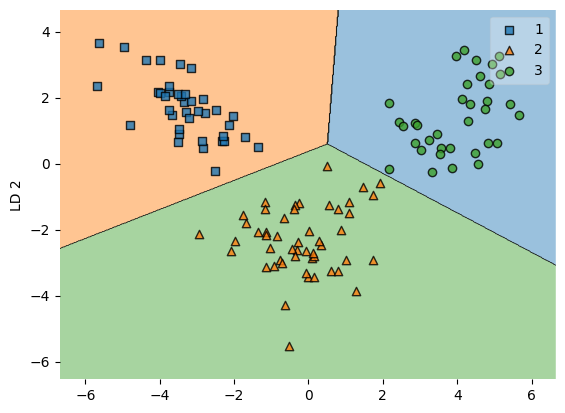

In [101]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train_lda,y_train,clf=lr)
plt.ylabel('LD 1')
plt.ylabel('LD 2')
plt.show()


#PCA Y LDA nos ayuda a separar variables linealmente separables